In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [3]:
#once uploaded you can read the file using appropriate libraries:

#for csv files:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('Mall_Customers.csv')

# 1. Inspect the dataset
print("Initial Dataset Information:")
print(df.info())  # Check column types and non-null values
print("\nMissing Values:")
print(df.isnull().sum())  # Check for missing values

# 2. Handle missing values (if any)
df['Gender'] = df['Gender'].fillna('Unknown')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Annual Income (k$)'] = df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].median())
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].fillna(df['Spending Score (1-100)'].median())

# 3. Remove duplicate rows
df.drop_duplicates(inplace=True)

# 4. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("\nStandardized Column Names:")
print(df.columns)

# 5. Feature engineering: Create age groups
bins = [0, 20, 40, 60, 100]
labels = ['Teenager', 'Young Adult', 'Middle Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# 6. Normalize numerical columns
scaler = StandardScaler()
df[['annual_income_(k$)', 'spending_score_(1-100)']] = scaler.fit_transform(
    df[['annual_income_(k$)', 'spending_score_(1-100)']]
)

# 7. Encode categorical variables
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])  # Encode gender: Male/Female/Unknown

# Final cleaned dataset
print("\nCleaned Dataset Head:")
print(df.head())

# Save the cleaned dataset to a new CSV file
df.to_csv('Cleaned_Mall_Customers.csv', index=False)
print("\nCleaned dataset saved as 'Cleaned_Mall_Customers.csv'.")

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Standardized Column Names:
Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

Cleaned Dataset Head:
   customerid  gender  age  annual_income_(k$)  spending_score_(1-100)  \
0           1       1   19           

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


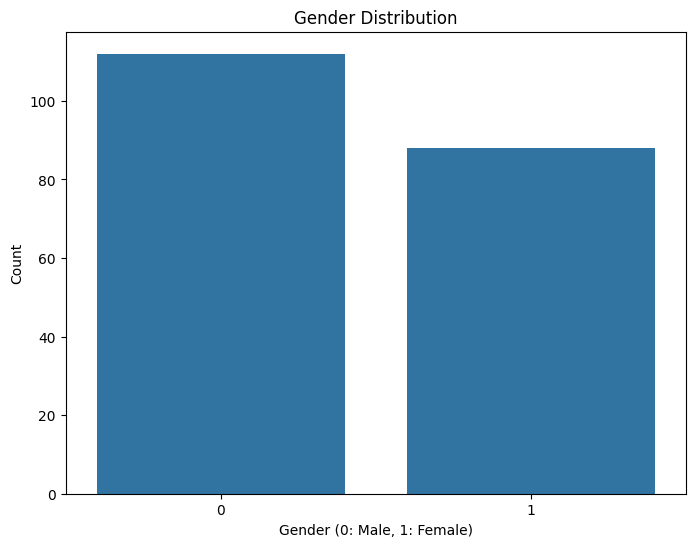

In [ ]:
# Bar Chart
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv('Cleaned_Mall_Customers.csv')

# Create bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')  # Gender is already encoded
plt.title('Gender Distribution')
plt.xlabel('Gender (0: Male, 1: Female)')  # Assuming your encoding
plt.ylabel('Count')
plt.show()

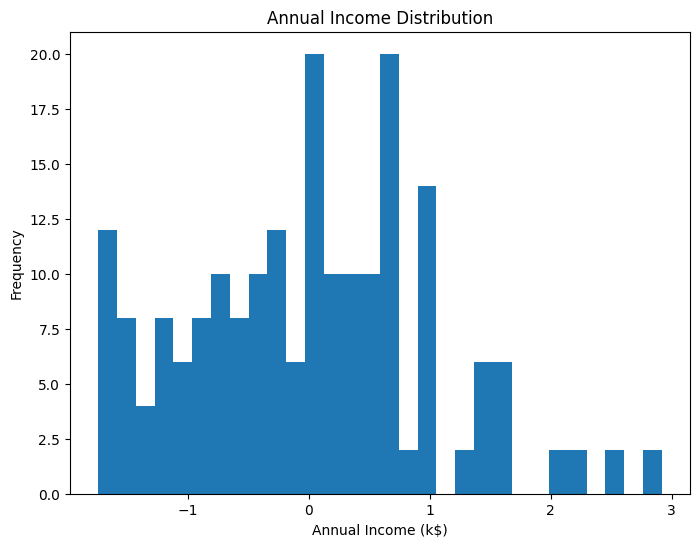

In [ ]:
#Histogram
import matplotlib.pyplot as plt
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv('Cleaned_Mall_Customers.csv')

# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(df['annual_income_(k$)'], bins=30)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

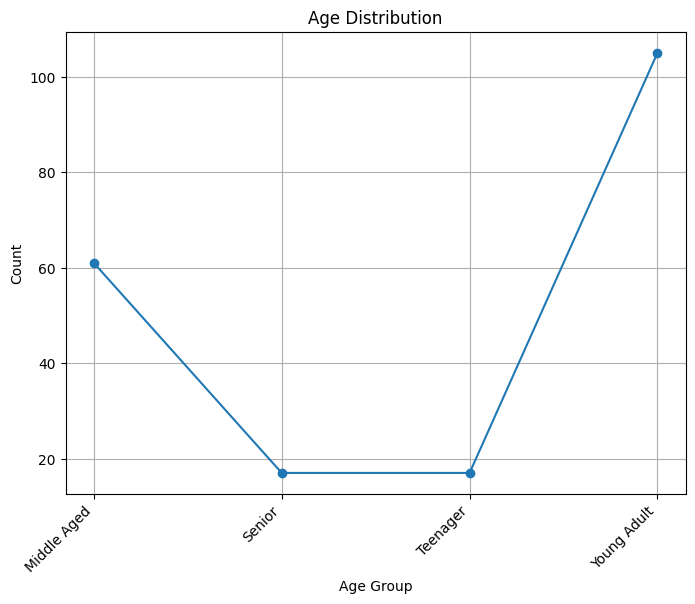

In [ ]:
#line chart
import matplotlib.pyplot as plt
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv('Cleaned_Mall_Customers.csv')

# Get age counts for each age group
age_counts = df['age_group'].value_counts().sort_index()

# Create line chart
plt.figure(figsize=(8, 6))
plt.plot(age_counts.index, age_counts.values, marker='o', linestyle='-')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

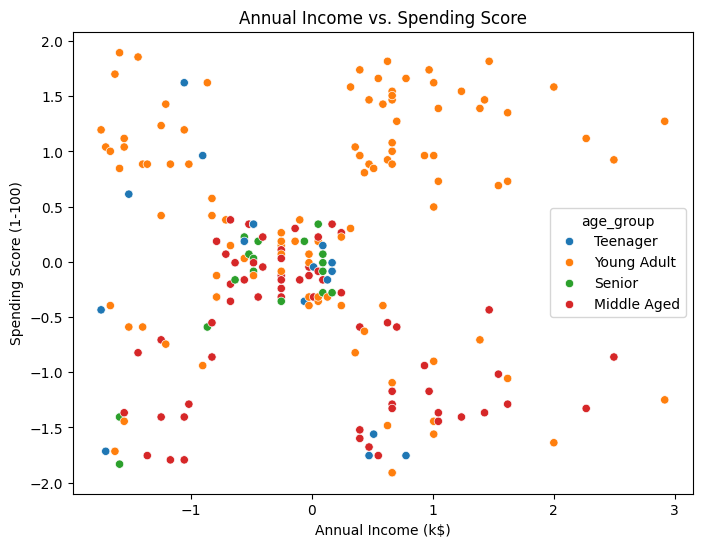

In [ ]:
#scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your cleaned dataset
df = pd.read_csv('Cleaned_Mall_Customers.csv')

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='annual_income_(k$)', y='spending_score_(1-100)', hue='age_group')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

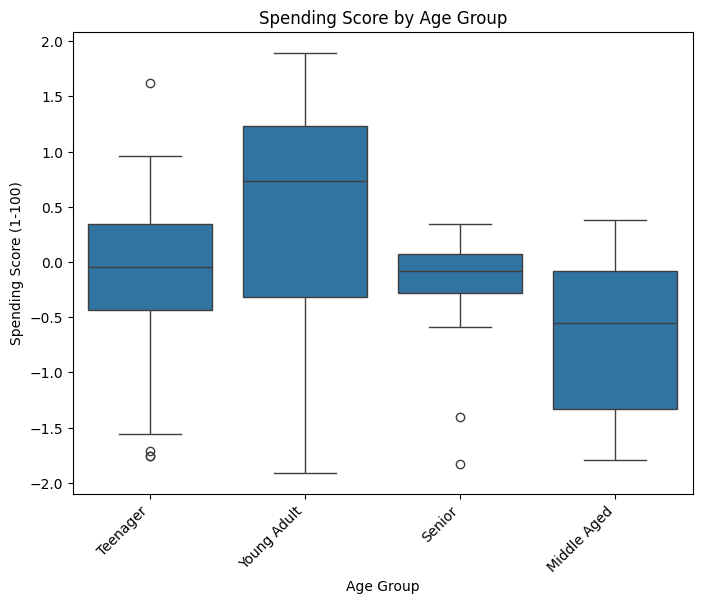

In [ ]:
#Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Cleaned_Mall_Customers.csv')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='age_group', y='spending_score_(1-100)')
plt.title('Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45, ha='right')
plt.show()

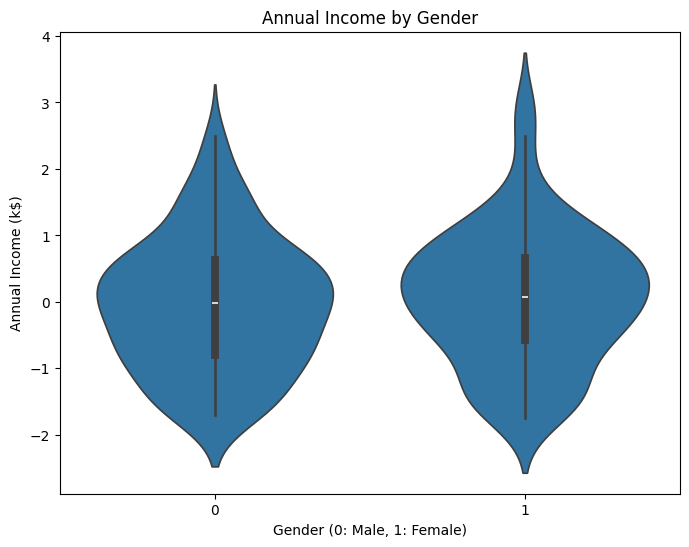

In [ ]:
#Violin Plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Cleaned_Mall_Customers.csv')
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='gender', y='annual_income_(k$)')
plt.title('Annual Income by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Annual Income (k$)')
plt.show()

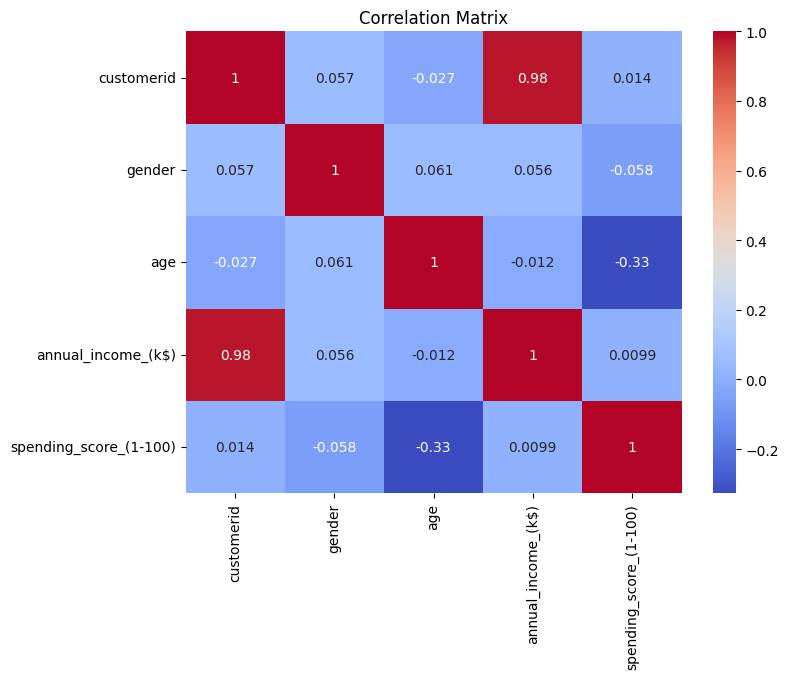

In [ ]:
#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Cleaned_Mall_Customers.csv')

# Select only numerical features for correlation
numerical_features = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

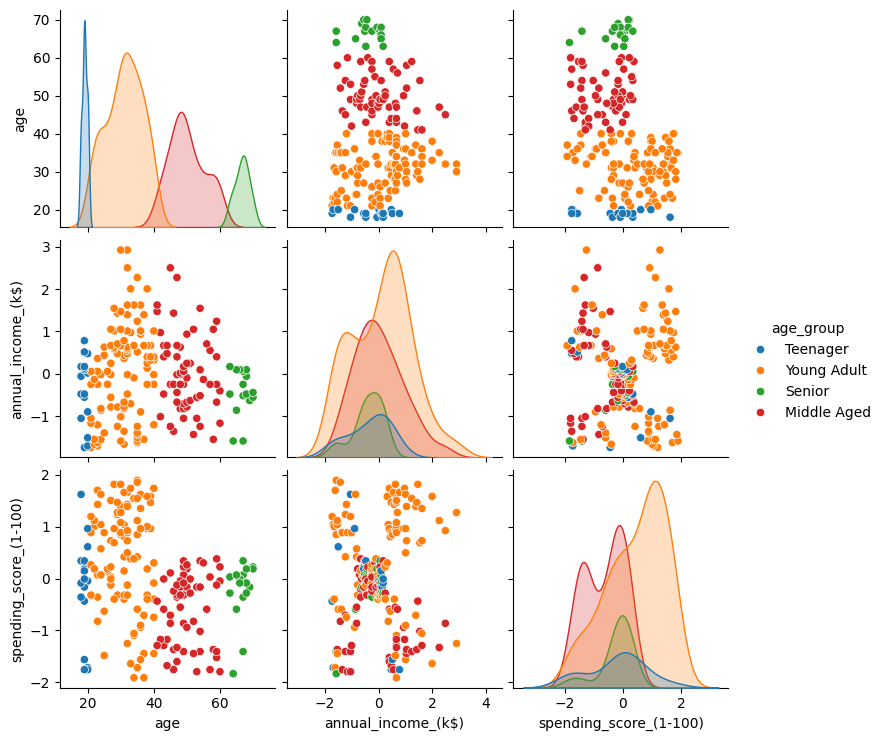

In [ ]:
#Pair Plot
import seaborn as sns
import pandas as pd

df = pd.read_csv('Cleaned_Mall_Customers.csv')
sns.pairplot(df[['age', 'annual_income_(k$)', 'spending_score_(1-100)', 'age_group']], hue='age_group')
plt.show()

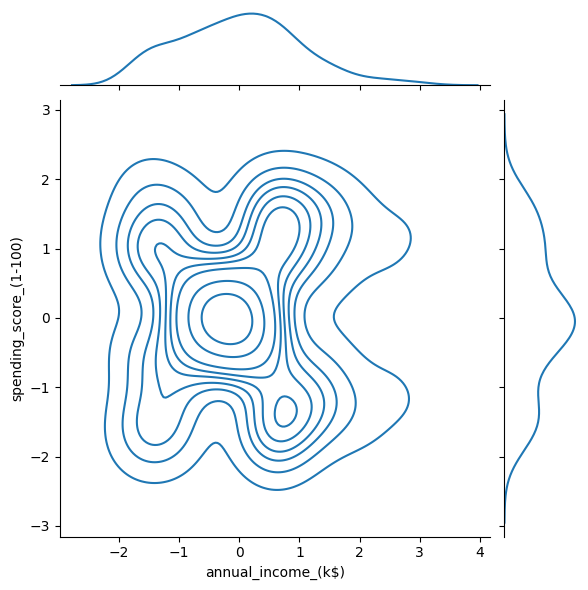

In [ ]:
#Joint Plot
import seaborn as sns
import pandas as pd

df = pd.read_csv('Cleaned_Mall_Customers.csv')
sns.jointplot(data=df, x='annual_income_(k$)', y='spending_score_(1-100)', kind='kde')
plt.show()

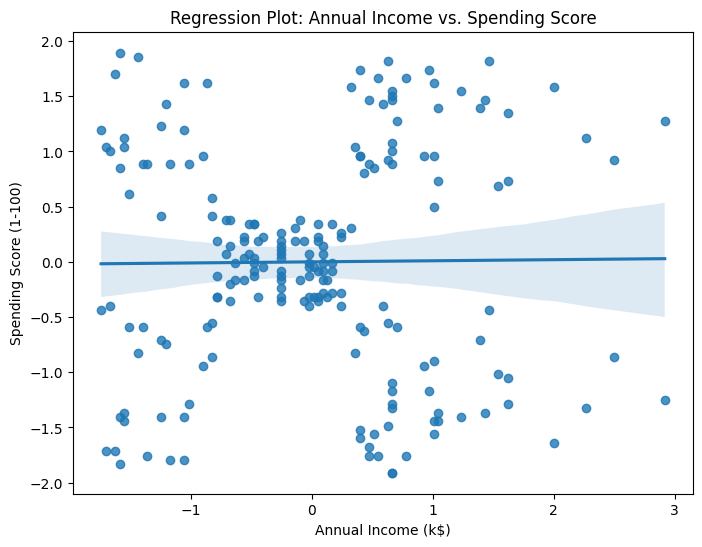

In [ ]:
#Regression Plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Mall_Customers.csv')

plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='annual_income_(k$)', y='spending_score_(1-100)')
plt.title('Regression Plot: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

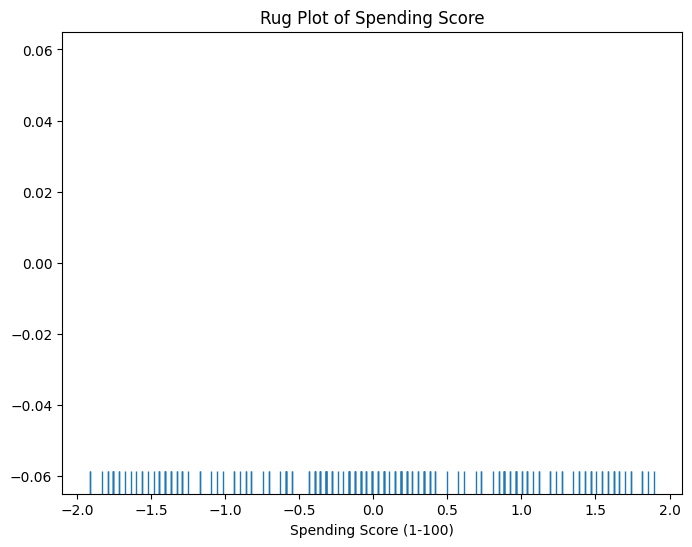

In [ ]:
#Rug Plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Mall_Customers.csv')

plt.figure(figsize=(8, 6))
sns.rugplot(data=df, x='spending_score_(1-100)', height=0.05)  # Adjust height as needed
plt.title('Rug Plot of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.show()

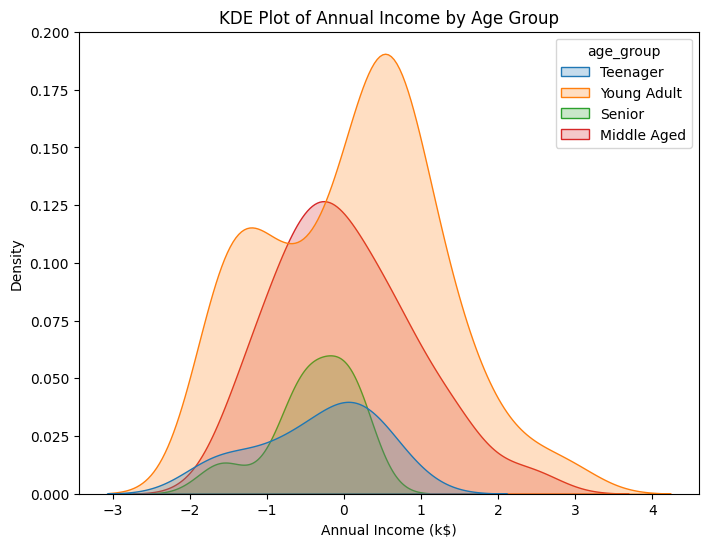

In [ ]:
#kde plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Mall_Customers.csv')

plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='annual_income_(k$)', hue='age_group', fill=True)  # Example with hue
plt.title('KDE Plot of Annual Income by Age Group')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

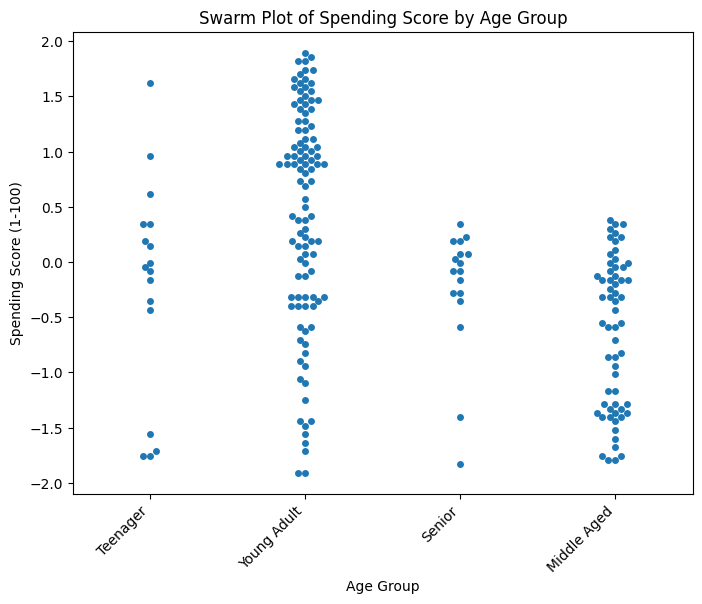

In [ ]:
#swarm plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Mall_Customers.csv')

plt.figure(figsize=(8, 6))
sns.swarmplot(data=df, x='age_group', y='spending_score_(1-100)')  # Example with age group
plt.title('Swarm Plot of Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

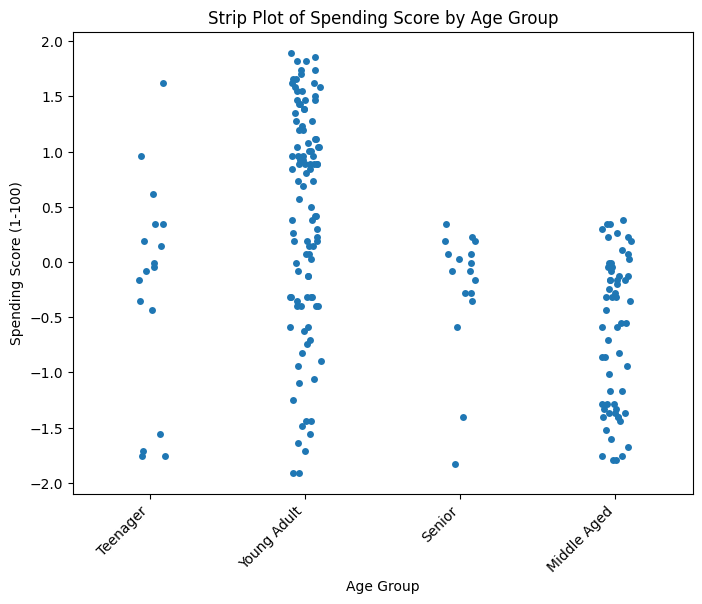

In [ ]:
#Strip Plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Mall_Customers.csv')

plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='age_group', y='spending_score_(1-100)', jitter=True)
plt.title('Strip Plot of Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

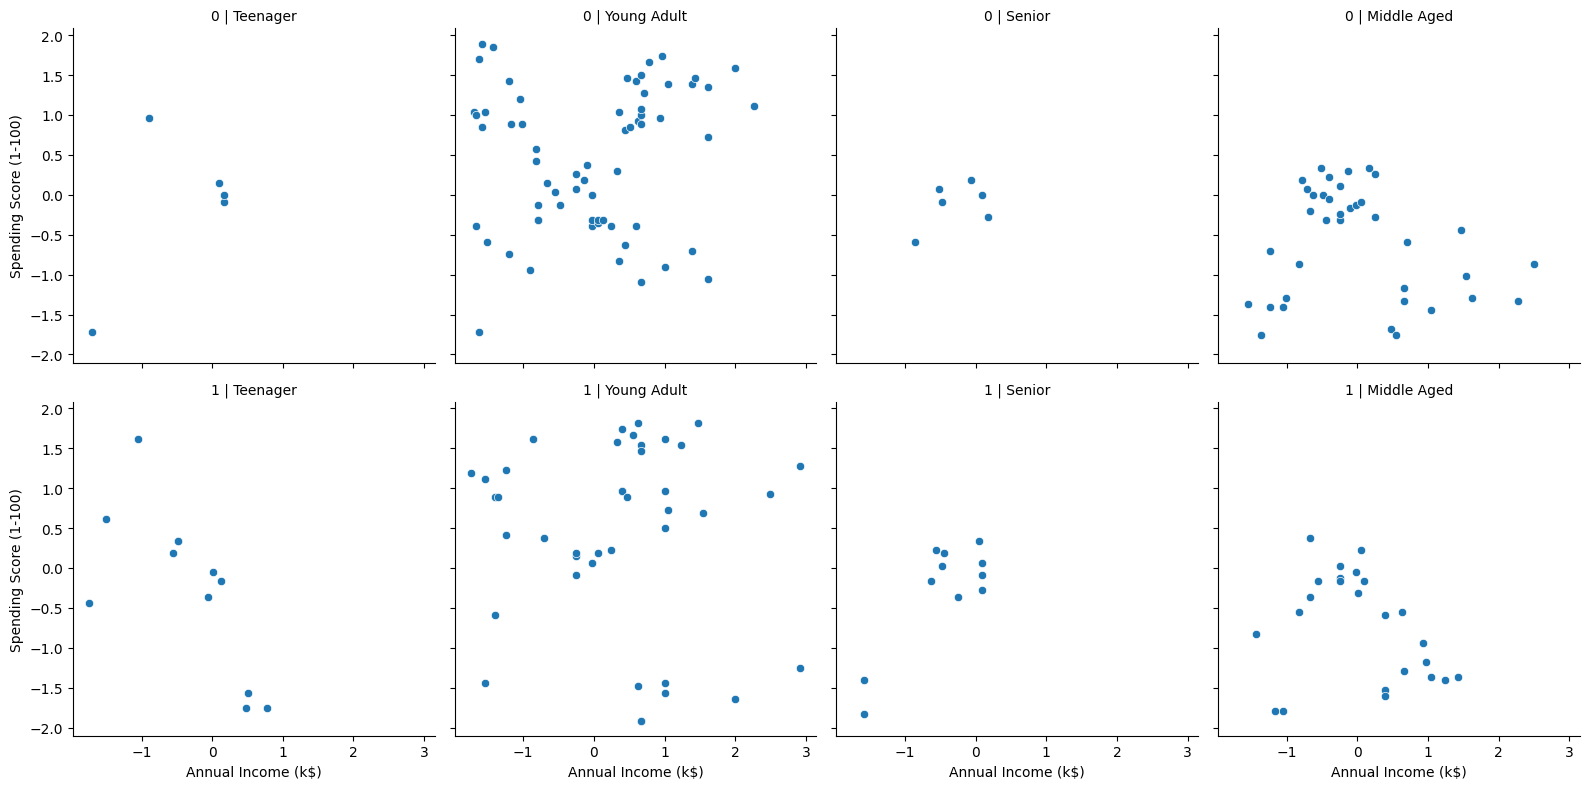

In [ ]:
#FacetGrid
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Mall_Customers.csv')

# Create a FacetGrid
g = sns.FacetGrid(df, col='age_group',  row='gender', height=4, aspect=1)

# Map a plotting function to each facet
g.map(sns.scatterplot, 'annual_income_(k$)', 'spending_score_(1-100)')

# Customize the plot
g.set_titles(col_template="{col_name}", row_template="{row_name}")  # Set facet titles
g.set_axis_labels("Annual Income (k$)", "Spending Score (1-100)")  # Set axis labels

plt.show()

conclusion
Analysis of the 'Mall Customers' dataset reveals key customer segments based on spending score, annual income, and age. High-value customers with high spending scores and incomes should be prioritized. Young adults and middle-aged adults represent attractive target groups. Marketing strategies should be tailored to each segment, considering age and gender differences. Customer relationship management is crucial for retaining valuable customers. By understanding these insights and applying targeted marketing, the mall can increase sales and profitability.